In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, ndimage
import cv2
import os

In [2]:
img = mpimg.imread('Data/SpiralGalaxy/original/apod_2023-08-11.jpg') # Full image

In [3]:
def plotHist(img):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    hist = plt.subplot(1,2,2)
    hist.set_ylabel('Count')
    hist.set_xlabel('Pixel Intensity')
    plt.hist(img.flatten(), bins=10, lw=0, alpha=0.5, color='r')

In [4]:
def plot_fft(img):
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_resized = cv2.resize(img_grayscale, dsize=(64, 64), interpolation=cv2.INTER_AREA)
    print(np.shape(img_gray_resized))
    img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_gray_resized)))
    display = np.log(np.abs(img_fft))
    plt.imshow(display/np.max(display))
    print(np.shape(display))
    return img_fft

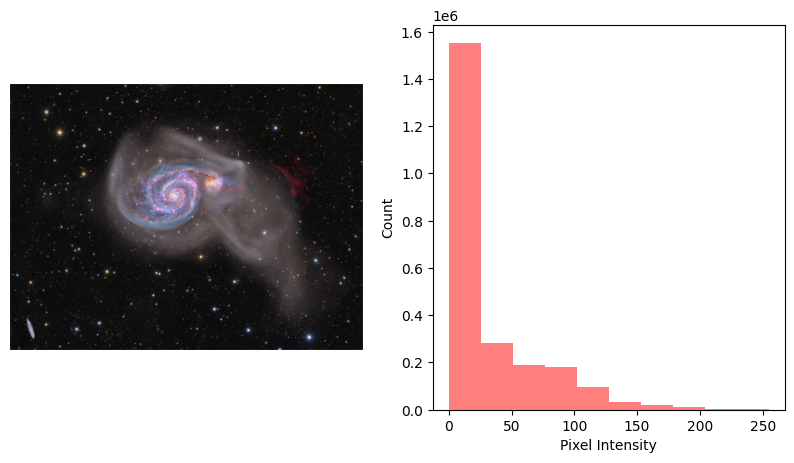

In [5]:
plotHist(img)

(64, 64)
(64, 64)


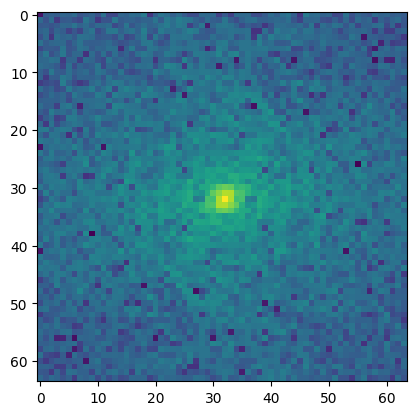

In [6]:
img_fft = plot_fft(img)

# Rescaling tests

In [7]:
image_size = 64 #px

In [8]:
PATH = "Data/SpiralGalaxy/original_cleaned/"

In [9]:
# Original size, no grayscale

def calc_ff2d():

    counter = 0
    for filename in os.listdir(PATH):
        
        file = os.path.join(PATH, filename)
        img_org = mpimg.imread(file)
        img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_org)))
        display = np.log(np.abs(img_fft))
        img_fft_norm = display/np.max(display)
        plt.imshow(img_org)
        plt.show()
        plt.imshow(img_fft_norm)
        plt.show()

        counter+= 1
        print(counter)


        if counter == 5:
            break

    

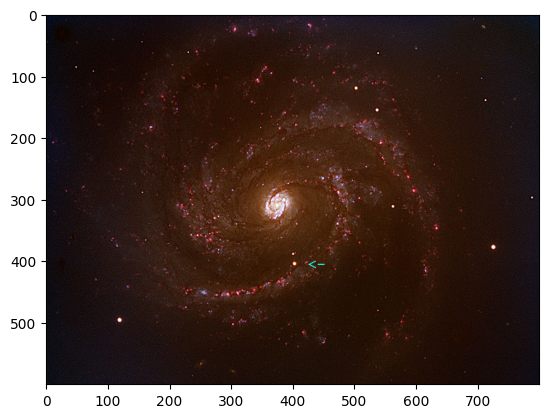

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


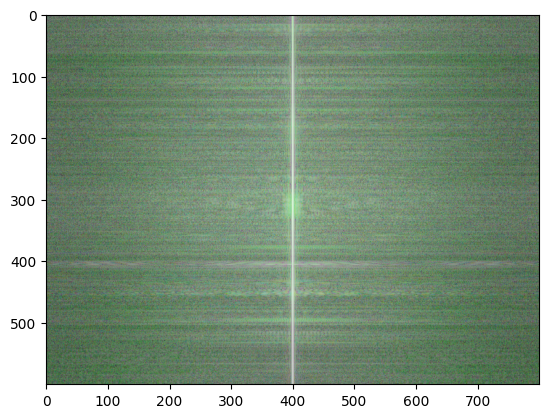

1


/tmp/ipykernel_2703016/1267663594.py:11: RuntimeWarning: divide by zero encountered in log
  display = np.log(np.abs(img_fft))


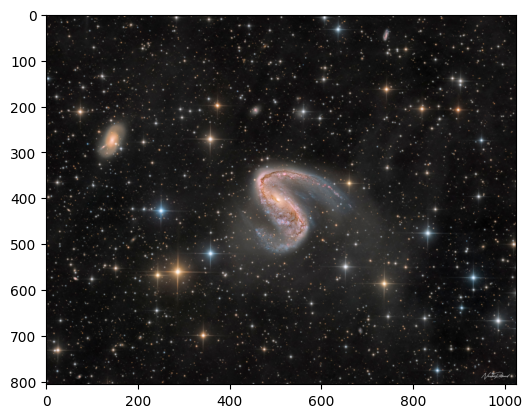

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


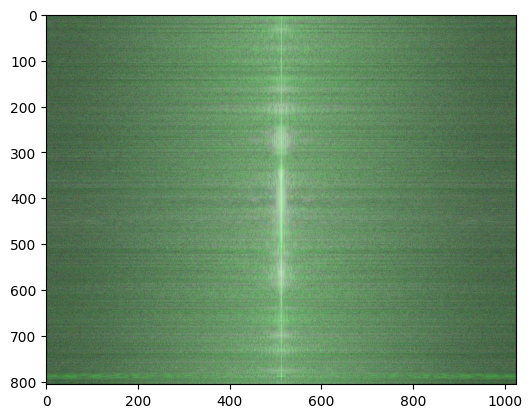

2


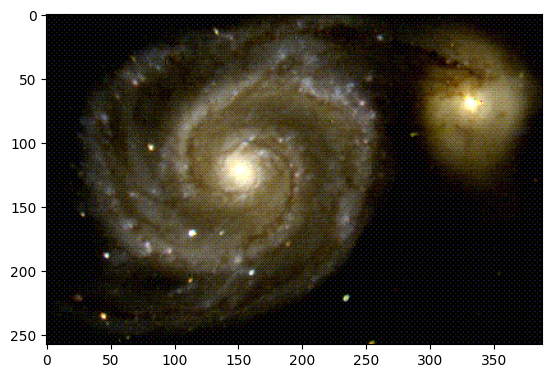

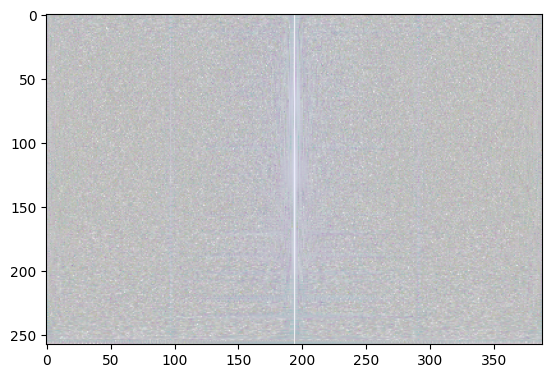

3


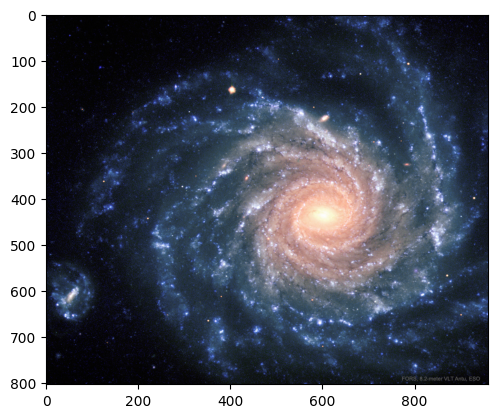

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


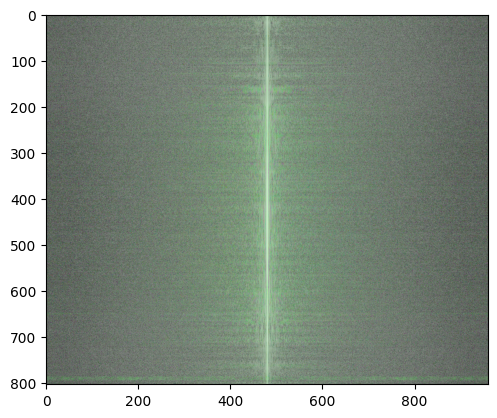

4


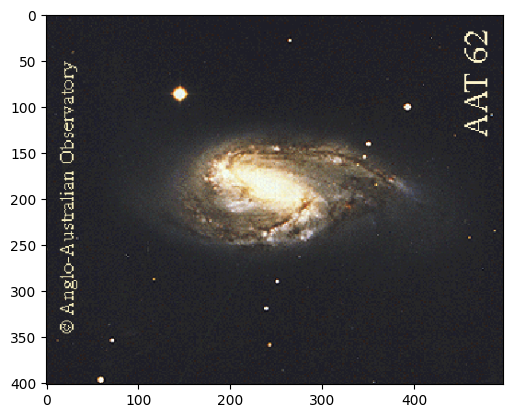

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


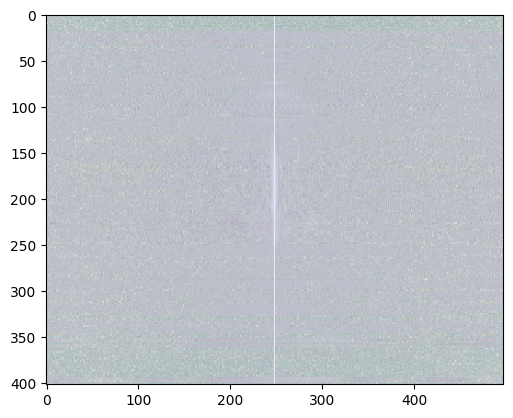

5


In [10]:
calc_ff2d()

In [25]:
# first ff2d and then reize
def calc_ff2d_2():

    counter = 0
    for filename in os.listdir(PATH):


        file = os.path.join(PATH, filename)
        img_org = mpimg.imread(file)
        img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_org)))   
        img_org_resized = cv2.resize(img_org, dsize=(64, 64), interpolation = cv2.INTER_LANCZOS4)
        display = np.log(np.abs(img_fft))
        img_fft_resized = cv2.resize(display, dsize=(64, 64))     
        img_fft_norm = img_fft_resized/np.max(img_fft_resized)
        plt.imshow(img_org_resized)
        plt.show()
        plt.imshow(img_fft_norm)
        plt.show()

        counter+= 1
        print(counter)
        

        if counter == 1:
            break
    

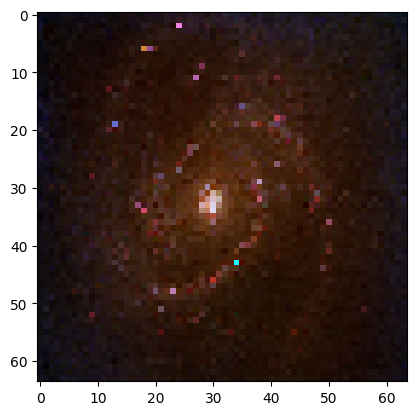

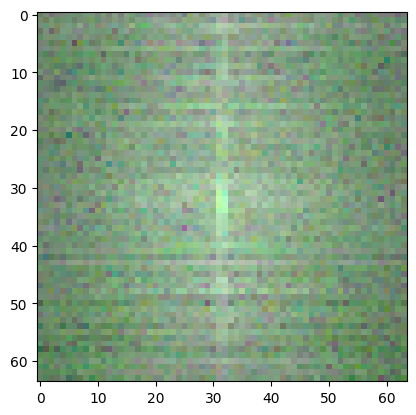

1


In [26]:
calc_ff2d_2()

In [13]:
# First resize and then calculate ff2d
def calc_ff2d_3():

    counter = 0
    for filename in os.listdir(PATH):


        file = os.path.join(PATH, filename)
        img_org = mpimg.imread(file)
        img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
        img_org_resized = cv2.resize(img_org, dsize=(64,64), interpolation=cv2.INTER_LINEAR)


        img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_org_resized)))
        fft_argument = np.log(np.abs(img_fft))
        img_fft_norm = fft_argument/np.max(fft_argument)
        #img_fft_resized = cv2.resize(img_fft_norm, dsize=(64,64), interpolation=cv2.INTER_LINEAR)



        plt.imshow(img_org_resized)
        print(img_org_resized.shape)
        plt.show()
        plt.imshow(img_fft_norm)
        print(img_fft_norm.shape)
        plt.show()

        counter+= 1
        print(counter)


        if counter == 10:
            break


    

In [43]:
from scipy import fft

In [ ]:
fft.ff

In [11]:
def concat_images(img_a, img_b):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha, wa = img_a.shape[:2]
    hb, wb = img_b.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width)) #, 1))
    new_img[:ha, :wa] = img_a
    new_img[:hb, wa:wa+wb] = img_b
    return new_img


In [25]:
def fft0():
    """
    Python script that calculates the 2D fourier transformation of all the spiral galaxy images, because these will be
    the input images for the NN.

    Bug 1: Grayscale does not reduce to 1 channel, but to 4.
    Bug 2: Non-grayscale image cannot be saved, because imsave requires normalized arrays. -> image distorted
    """
    counter = 0

    for filename in os.listdir(PATH):

        file = os.path.join(PATH, filename)
        image_name = filename[:-4]

        # Convert to 1-channel grayscale and resize to 64px
        img_org = mpimg.imread(file)
        
        img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
        img_org_resized = cv2.resize(img_org, dsize=(64,64), interpolation=cv2.INTER_AREA)

        img_org_resized = img_org_resized - np.mean(img_org_resized)

        # Calculate FF2D incl. Shift
        img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_org_resized)))
        fft_argument = (np.abs(img_fft))
        img_fft_norm = fft_argument/np.max(fft_argument)


        # Plot real and imaginary part:
        img_fft_norm2 = img_fft/np.max(abs(img_fft))

        re = (img_fft_norm2.real + 1)/2
        im = (img_fft_norm2.imag + 1)/2

        
        # Seems to be required, otherwise images are saved as black -> Unclear why ?
        # img_org_resized = cv2.convertScaleAbs(img_org_resized, alpha=(255.0))
        #img_fft_norm = cv2.convertScaleAbs(img_fft_norm, alpha=(255.0))

        # Need to combine image to deal with tensorflow
        #combined_image = concat_images(img_org_resized, img_fft_norm)

        # Save or display images > use cv2 instead of matplotlib, as this always saves as (64,64,4)
        # Already save them in test & train & validation datasets; seems random TODO: Improve/Cross-Check
  
        plt.imshow(img_org_resized)
        plt.show()
        #plt.imshow(img_fft_norm)
        #plt.show()
        #plt.imshow(re)
        #plt.show()
        #plt.imshow(im)
        #plt.show()
        counter += 1
        if counter == 2:
            break
        print(np.mean(img_org_resized))
        print(np.mean(img_fft_norm))
    return img_fft_norm

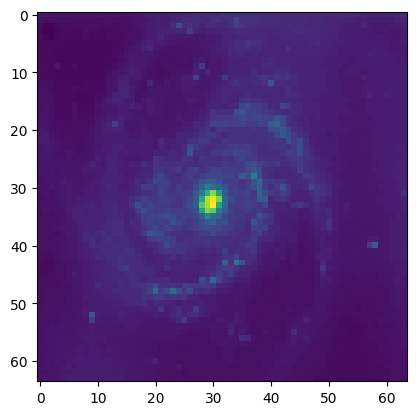

0.0
0.02234466761664131


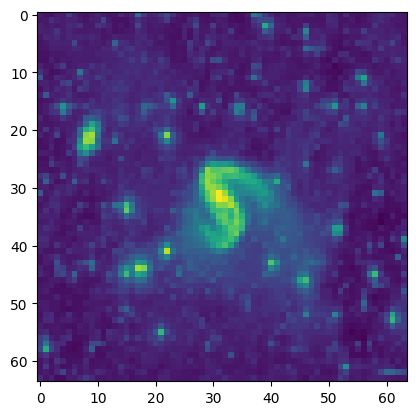

In [26]:
q = fft0()

In [77]:
np.max(q.imag)

0.5084525662960038

In [32]:
test = mpimg.imread('Data/SpiralGalaxy/test/apod_1996-04-21.jpg')

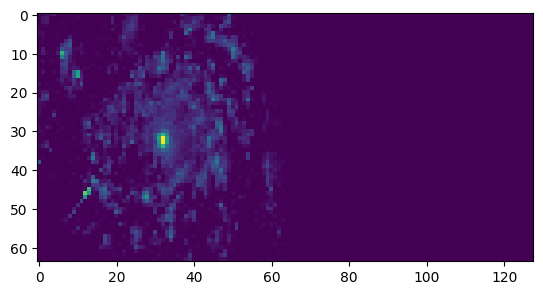

In [33]:
plt.imshow(test)